In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from datetime import timedelta, datetime
#import holidays

import matplotlib
import pickle
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.width', 500)

In [2]:
targets_train = pd.read_csv('../../../data/targets_train.csv')
uf_test = pd.read_csv('../../../data/user_features_test.csv')
uf_train = pd.read_csv('../../../data/user_features_train.csv')
users_test = pd.read_csv('../../../data/users_test.csv')
users_train = pd.read_csv('../../../data/users_train.csv')

In [3]:
df_train = pd.read_csv('../../../data/df_train_preprocessed.csv')

In [5]:
targets_train.head()

,ID,TARGET
0,0,0.000000
1,1,0.018892
2,2,0.000000
3,3,0.046650
4,4,0.014680


In [6]:
uf_train.head()

,ID,first_prediction,RetentionD0,RetentionD1,RetentionD2,RetentionD3,RetentionD4,RetentionD5,RetentionD6,RetentionD7,RetentionD8,RetentionD9,RetentionD10,RetentionD11,RetentionD12,RetentionD13,RetentionD14,RetentionD15,LevelAdvancedCountD0,LevelAdvancedCountD1,LevelAdvancedCountD2,LevelAdvancedCountD3,LevelAdvancedCountD4,LevelAdvancedCountD5,LevelAdvancedCountD6,LevelAdvancedCountD7,LevelAdvancedCountD8,LevelAdvancedCountD9,LevelAdvancedCountD10,LevelAdvancedCountD11,LevelAdvancedCountD12,LevelAdvancedCountD13,LevelAdvancedCountD14,LevelAdvancedCountD15,Level_1_Duration,Level_2_Duration,Level_3_Duration,Level_4_Duration,Level_5_Duration,Level_6_Duration,Level_7_Duration,Level_8_Duration,Level_9_Duration,Level_10_Duration,AdRevenueD0,AdRevenueD1,AdRevenueD2,AdRevenueD3,AdRevenueD4,AdRevenueD5,AdRevenueD6,AdRevenueD7,AdRevenueD8,AdRevenueD9,AdRevenueD10,AdRevenueD11,AdRevenueD12,AdRevenueD13,AdRevenueD14,AdRevenueD15,IAPRevenueD0,IAPRevenueD1,IAPRevenueD2,IAPRevenueD3,IAPRevenueD4,IAPRevenueD5,IAPRevenueD6,IAPRevenueD7,IAPRevenueD8,IAPRevenueD9,IAPRevenueD10,IAPRevenueD11,IAPRevenueD12,IAPRevenueD13,IAPRevenueD14,IAPRevenueD15
0,0,3.314099,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26.000000,69.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1.681524,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,5,0,0,0,0,0,3,5,0,2,0,0,0,0,0,0,13.000000,91.000000,39.000000,79.000000,180.000000,89.000000,124.000000,118.000000,35.000000,117.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008674,0.000000,0.010218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,10.718750,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000000,63.000000,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,5.100000,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,19,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,23.000000,141.000000,131.000000,118.000000,77.000000,107.000000,77.000000,182.000000,42.000000,156.000000,0.002150,0.019159,0.025341,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,2.091409,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.000000,52.000000,30.000000,84.000000,139.000000,96.000000,268.000000,97.000000,44.000000,122.000000,0.014680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
users_train.head()

,ID,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network
0,0,2024-03-02,1709355895042000,1709334295042000,Mexico,Android,mobile,Xiaomi,Redmi A2,False,unityads_int
1,1,2024-03-19,1710824539731000,1710806539731000,Peru,Android,mobile,Samsung,Galaxy A13,False,applovin_int
2,2,2024-03-18,1710731043082000,1710720243082000,Brazil,Android,mobile,Xiaomi,Redmi 12,False,applovin_int
3,3,2024-03-03,1709455862260000,1709441462260000,Dominican Republic,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN
4,4,2024-04-30,1714482477190000,1714464477190000,Ecuador,Android,mobile,Motorola,Moto E22,False,applovin_int


In [4]:
df_train = pd.merge(df_train, users_train, on='ID')

In [9]:
df_train.head()

,ID,TARGET,open_year,open_month,first_prediction,log_first_prediction,economic_class,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue,first_open_date,first_open_timestamp,local_first_open_timestamp,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network
0,0,0.000000,2024,3,3.314099,1.198186,lower_middle_class,-30.000000,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-03-02,1709355895042000,1709334295042000,Mexico,Android,mobile,Xiaomi,Redmi A2,False,unityads_int
1,1,0.000000,2024,3,1.681524,0.519701,lower_middle_class,-30.000000,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.008674,0.010218,0.000000,0.000000,0.000000,0.000000,0.000000,0.018892,0.000000,2024-03-19,1710824539731000,1710806539731000,Peru,Android,mobile,Samsung,Galaxy A13,False,applovin_int
2,2,0.000000,2024,3,10.718750,2.371995,lower_middle_class,-30.000000,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-03-18,1710731043082000,1710720243082000,Brazil,Android,mobile,Xiaomi,Redmi 12,False,applovin_int
3,3,0.000000,2024,3,5.100000,1.629241,lower_middle_class,-30.000000,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.046650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046650,0.000000,2024-03-03,1709455862260000,1709441462260000,Dominican Republic,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN
4,4,0.000000,2024,4,2.091409,0.737838,lower_middle_class,-30.000000,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.014680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014680,0.000000,2024-04-30,1714482477190000,1714464477190000,Ecuador,Android,mobile,Motorola,Moto E22,False,applovin_int


In [5]:
df_train.drop(columns=['first_open_date','first_open_timestamp','local_first_open_timestamp'], inplace=True)

In [11]:
df_train.head()

,ID,TARGET,open_year,open_month,first_prediction,log_first_prediction,economic_class,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue,country,platform,device_category,device_brand,device_model,has_ios_att_permission,ad_network
0,0,0.000000,2024,3,3.314099,1.198186,lower_middle_class,-30.000000,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Mexico,Android,mobile,Xiaomi,Redmi A2,False,unityads_int
1,1,0.000000,2024,3,1.681524,0.519701,lower_middle_class,-30.000000,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.008674,0.010218,0.000000,0.000000,0.000000,0.000000,0.000000,0.018892,0.000000,Peru,Android,mobile,Samsung,Galaxy A13,False,applovin_int
2,2,0.000000,2024,3,10.718750,2.371995,lower_middle_class,-30.000000,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brazil,Android,mobile,Xiaomi,Redmi 12,False,applovin_int
3,3,0.000000,2024,3,5.100000,1.629241,lower_middle_class,-30.000000,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.046650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046650,0.000000,Dominican Republic,iOS,mobile,Apple,iPhone 11 Pro Max,False,NaN
4,4,0.000000,2024,4,2.091409,0.737838,lower_middle_class,-30.000000,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.014680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014680,0.000000,Ecuador,Android,mobile,Motorola,Moto E22,False,applovin_int


In [12]:
df_train['country'].value_counts()

country
United States               114723
Brazil                      112146
Mexico                       99146
Argentina                    55172
France                       40222
Germany                      39379
India                        38435
Colombia                     36935
Spain                        30159
Italy                        28044
Chile                        23511
Turkey                       22982
Ecuador                      21189
Peru                         17090
Indonesia                    14467
United Kingdom               11839
Canada                       11790
Venezuela                    11558
Poland                        9918
Portugal                      9705
Costa Rica                    7795
Belgium                       7221
Romania                       6988
Austria                       6956
Bolivia                       6460
Switzerland                   6199
Russia                        5669
Australia                     5366
Malaysia    

In [6]:
country_cols =   ['United States',
                  'Brazil',        
                  'Mexico',        
                  'Argentina',     
                  'France',        
                  'Germany',       
                  'India',         
                  'Colombia',      
                  'Spain',         
                  'Italy',         
                  'Chile',         
                  'Turkey',        
                  'Ecuador',       
                  'Peru',          
                  'Indonesia',     
                  'United Kingdom',
                  'Canada',        
                  'Venezuela']

In [7]:
df_train['country'] = df_train['country'].apply(lambda x: x if x in country_cols else 'Other')

In [8]:
df_train['country'].value_counts()

country
Other             149807
United States     114723
Brazil            112146
Mexico             99146
Argentina          55172
France             40222
Germany            39379
India              38435
Colombia           36935
Spain              30159
Italy              28044
Chile              23511
Turkey             22982
Ecuador            21189
Peru               17090
Indonesia          14467
United Kingdom     11839
Canada             11790
Venezuela          11558
Name: count, dtype: int64

In [27]:
df_train['platform'].value_counts()

platform
Android    514971
iOS        363623
Name: count, dtype: int64

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878594 entries, 0 to 878593
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      878594 non-null  int64  
 1   TARGET                  878594 non-null  float64
 2   open_year               878594 non-null  int64  
 3   open_month              878594 non-null  int64  
 4   first_prediction        852859 non-null  float64
 5   log_first_prediction    852859 non-null  float64
 6   economic_class          878594 non-null  object 
 7   log_TARGET              878594 non-null  float64
 8   Retention_count_D0_3    878594 non-null  int64  
 9   Retention_count_D4_7    878594 non-null  int64  
 10  Retention_count_D8_11   878594 non-null  int64  
 11  Retention_count_D12_15  878594 non-null  int64  
 12  Avg_Lvl_Count_D0_3      878594 non-null  float64
 13  Avg_Lvl_Count_D4_7      878594 non-null  float64
 14  Avg_Lvl_Count_D8_11 

In [30]:
df_train['device_category'].value_counts()

device_category
mobile    794214
tablet     84380
Name: count, dtype: int64

In [34]:
df_train.groupby('country')['log_TARGET'].mean()

country
Argentina        -21.406283
Brazil           -21.993435
Canada           -20.318970
Chile            -20.780909
Colombia         -20.985297
Ecuador          -21.828853
France           -21.019983
Germany          -21.396430
India            -21.824346
Indonesia        -22.026260
Italy            -20.883138
Mexico           -20.847755
Other            -21.666219
Peru             -21.060682
Spain            -21.542962
Turkey           -21.340762
United Kingdom   -22.381977
United States    -20.816990
Venezuela        -21.446237
Name: log_TARGET, dtype: float64

In [31]:
df_train.groupby('device_category')['log_TARGET'].mean()

device_category
mobile   -21.454539
tablet   -20.369618
Name: log_TARGET, dtype: float64

In [32]:
df_train.groupby('platform')['log_TARGET'].mean()

platform
Android   -22.105947
iOS       -20.280240
Name: log_TARGET, dtype: float64

In [33]:
df_train['device_brand'].value_counts()

device_brand
Apple                363623
Samsung              225831
Xiaomi                82158
Motorola              76009
OPPO                  22920
Vivo                  14418
Huawei                13083
Honor                 12594
Realme                12160
Tecno                  8683
Infinix                7491
OnePlus                5780
ZTE                    4032
Lenovo                 3610
LG                     3217
Google                 3210
TCL                    2937
Nokia                  1290
POCO                    941
T-Mobile                704
Alcatel                 561
BLU                     524
Asus                    415
Sony                    393
Cubot                   319
DOOGEE                  299
itel                    285
Blackview               284
ONN                     264
Hisense                 243
Umidigi                 211
Wiko                    205
Sky Devices             179
Nothing                 148
Reeder                  140
Maxwest

In [8]:
brand_cols = ['Apple',
              'Samsung',            
              'Xiaomi',             
              'Motorola',           
              'OPPO',               
              'Vivo',               
              'Huawei',             
              'Honor',              
              'Real']

In [9]:
df_train['device_brand'] = df_train['device_brand'].apply(lambda x: x if x in brand_cols else 'Other')

In [11]:
df_train['device_brand'].value_counts()

device_brand
Apple       363623
Samsung     225831
Xiaomi       82158
Motorola     76009
Other        67958
OPPO         22920
Vivo         14418
Huawei       13083
Honor        12594
Name: count, dtype: int64

In [39]:
df_train.groupby('device_brand')['log_TARGET'].mean()

device_brand
Apple      -20.280240
Honor      -20.408930
Huawei     -22.431487
Motorola   -21.731404
OPPO       -21.912052
Other      -22.730204
Samsung    -22.175784
Vivo       -22.041527
Xiaomi     -22.017823
Name: log_TARGET, dtype: float64

In [40]:
df_train['device_model'].value_counts()

device_model
iPhone 11                                   52461
iPhone                                      39217
iPhone 13                                   31745
iPhone 12                                   21078
iPhone 14 Pro Max                           19125
iPhone 14                                   17680
iPhone 13 Pro Max                           16296
iPad (9th gen)                              14970
iPhone XR                                   13770
iPad Air (4th gen)                          12779
iPhone 14 Pro                                9221
Galaxy A13                                   8898
iPhone 8 Plus                                8151
iPhone 13 Pro                                7989
iPhone 14 Plus                               7364
Galaxy A54                                   7357
Galaxy S23 Ultra                             7303
Galaxy A14                                   7178
iPhone 11 Pro Max                            6676
iPhone 12 Pro                        

In [10]:
df_train.drop(columns=['device_model'], inplace=True)

In [42]:
df_train['has_ios_att_permission'].value_counts()

has_ios_att_permission
False    764921
True     113673
Name: count, dtype: int64

In [43]:
df_train['ad_network'].value_counts()

ad_network
applovin_int         520202
unityads_int          40855
Facebook Ads           3643
googleadwords_int      3288
restricted              119
ironsource_int           13
Cross_sale                4
Name: count, dtype: int64

In [11]:
df_train['ad_network'] = df_train['ad_network'].apply(lambda x: x if x not in ['restricted', 'ironsource_int', 'Cross_sale'] else 'Other')

In [14]:
df_train['ad_network'].value_counts()

ad_network
applovin_int         520202
unityads_int          40855
Facebook Ads           3643
googleadwords_int      3288
Other                   136
Name: count, dtype: int64

In [12]:
df_train['ad_network'] = np.where(df_train['ad_network'].isnull(), 'Nan', df_train['ad_network'])

In [22]:
df_train['ad_network'].value_counts()

ad_network
applovin_int         520202
Nan                  310470
unityads_int          40855
Facebook Ads           3643
googleadwords_int      3288
Other                   136
Name: count, dtype: int64

In [24]:
df_train.head()

,ID,TARGET,open_year,open_month,first_prediction,log_first_prediction,economic_class,log_TARGET,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_AdRevenueD0_3,Total_AdRevenueD4_7,Total_AdRevenueD8_11,Total_AdRevenueD12_15,Total_IAPRevenueD0_3,Total_IAPRevenueD4_7,Total_IAPRevenueD8_11,Total_IAPRevenueD12_15,Total_AdRevenue,Total_IAPRevenue,country,platform,device_category,device_brand,has_ios_att_permission,ad_network
0,0,0.000000,2024,3,3.314099,1.198186,lower_middle_class,-30.000000,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Mexico,Android,mobile,Xiaomi,False,unityads_int
1,1,0.000000,2024,3,1.681524,0.519701,lower_middle_class,-30.000000,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.008674,0.010218,0.000000,0.000000,0.000000,0.000000,0.000000,0.018892,0.000000,Peru,Android,mobile,Samsung,False,applovin_int
2,2,0.000000,2024,3,10.718750,2.371995,lower_middle_class,-30.000000,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Brazil,Android,mobile,Xiaomi,False,applovin_int
3,3,0.000000,2024,3,5.100000,1.629241,lower_middle_class,-30.000000,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.046650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046650,0.000000,Other,iOS,mobile,Apple,False,Nan
4,4,0.000000,2024,4,2.091409,0.737838,lower_middle_class,-30.000000,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.014680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014680,0.000000,Ecuador,Android,mobile,Motorola,False,applovin_int


In [13]:
cols =  ['ID', 'TARGET', 'log_TARGET', 'first_prediction', 'log_first_prediction', 'economic_class', 
         'Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
         'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15',
         'Avg_Duration_Lvl0_3', 'Avg_Duration_Lvl4_7', 'Avg_Duration_Lvl8_10', 
         'Total_IAPRevenue', 'Total_AdRevenue',
        'country', 'platform', 'device_category', 'device_brand', 'has_ios_att_permission', 'ad_network']

In [14]:
df_train = df_train[cols]

In [32]:
df_train.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,economic_class,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,country,platform,device_category,device_brand,has_ios_att_permission,ad_network,target_class
0,0,0.000000,-30.000000,3.314099,1.198186,lower_middle_class,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,Mexico,Android,mobile,Xiaomi,False,unityads_int,1
1,1,0.000000,-30.000000,1.681524,0.519701,lower_middle_class,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.018892,Peru,Android,mobile,Samsung,False,applovin_int,1
2,2,0.000000,-30.000000,10.718750,2.371995,lower_middle_class,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,Brazil,Android,mobile,Xiaomi,False,applovin_int,1
3,3,0.000000,-30.000000,5.100000,1.629241,lower_middle_class,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.000000,0.046650,Other,iOS,mobile,Apple,False,Nan,1
4,4,0.000000,-30.000000,2.091409,0.737838,lower_middle_class,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.000000,0.014680,Ecuador,Android,mobile,Motorola,False,applovin_int,1


In [29]:
df_train['economic_class'].value_counts()

economic_class
lower_middle_class    404918
upper_middle_class    387587
wealthy                35752
Nan                    25735
poor                   24602
Name: count, dtype: int64

In [15]:
df_train['target_class'] = np.where(round(df_train['log_TARGET'], 1) <= -29.9, 1, 0) # class 1 means TARGET is 0.0 

In [33]:
df_train.to_csv('../../../data/w_user_data/df_train_preprocessed.csv', index=False)

In [16]:
df_train = pd.read_csv('../../../data/w_user_data/df_train_preprocessed.csv')

In [17]:
df_nan = df_train[df_train['economic_class'] == 'Nan']

In [18]:
df_train = df_train[df_train['economic_class'] != 'Nan']

In [36]:
df_nan.to_csv('../../../data/w_user_data/train_df_nan.csv', index=False)

**Classifier**

In [19]:
df_copy = df_train.copy()

In [20]:
economic_class_dummies = pd.get_dummies(df_copy.economic_class , prefix = 'economic_class', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, economic_class_dummies], axis = 1)

In [45]:
df_copy.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,economic_class,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,country,platform,device_category,device_brand,has_ios_att_permission,ad_network,target_class,economic_class_poor,economic_class_upper_middle_class,economic_class_wealthy
0,0,0.000000,-30.000000,3.314099,1.198186,lower_middle_class,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,Mexico,Android,mobile,Xiaomi,False,unityads_int,1,0,0,0
1,1,0.000000,-30.000000,1.681524,0.519701,lower_middle_class,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.018892,Peru,Android,mobile,Samsung,False,applovin_int,1,0,0,0
2,2,0.000000,-30.000000,10.718750,2.371995,lower_middle_class,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,Brazil,Android,mobile,Xiaomi,False,applovin_int,1,0,0,0
3,3,0.000000,-30.000000,5.100000,1.629241,lower_middle_class,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.000000,0.046650,Other,iOS,mobile,Apple,False,Nan,1,0,0,0
4,4,0.000000,-30.000000,2.091409,0.737838,lower_middle_class,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.000000,0.014680,Ecuador,Android,mobile,Motorola,False,applovin_int,1,0,0,0


In [21]:
country_dummies = pd.get_dummies(df_copy.country , prefix = 'country', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, country_dummies], axis = 1)

In [22]:
platform_dummies = pd.get_dummies(df_copy.platform , prefix = 'platform', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, platform_dummies], axis = 1)

In [23]:
device_category_dummies = pd.get_dummies(df_copy.device_category , prefix = 'device_category', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, device_category_dummies], axis = 1)

In [24]:
device_brand_dummies = pd.get_dummies(df_copy.device_brand , prefix = 'device_brand', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, device_brand_dummies], axis = 1)

In [25]:
has_ios_att_permission_dummies = pd.get_dummies(df_copy.has_ios_att_permission , prefix = 'has_ios_att_permission', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, has_ios_att_permission_dummies], axis = 1)

In [26]:
ad_network_dummies = pd.get_dummies(df_copy.ad_network , prefix = 'ad_network', drop_first=True, dtype=int)
df_copy = pd.concat([df_copy, ad_network_dummies], axis = 1)

In [55]:
df_copy.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,economic_class,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,country,platform,device_category,device_brand,has_ios_att_permission,ad_network,target_class,economic_class_poor,economic_class_upper_middle_class,economic_class_wealthy,country_Brazil,country_Canada,country_Chile,country_Colombia,country_Ecuador,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Mexico,country_Other,country_Peru,country_Spain,country_Turkey,country_United Kingdom,country_United States,country_Venezuela,platform_iOS,device_category_tablet,device_brand_Honor,device_brand_Huawei,device_brand_Motorola,device_brand_OPPO,device_brand_Other,device_brand_Samsung,device_brand_Vivo,device_brand_Xiaomi,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int,has_ios_att_permission_True,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int
0,0,0.000000,-30.000000,3.314099,1.198186,lower_middle_class,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,Mexico,Android,mobile,Xiaomi,False,unityads_int,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0.000000,-30.000000,1.681524,0.519701,lower_middle_class,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.018892,Peru,Android,mobile,Samsung,False,applovin_int,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,0.000000,-30.000000,10.718750,2.371995,lower_middle_class,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,Brazil,Android,mobile,Xiaomi,False,applovin_int,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,3,0.000000,-30.000000,5.100000,1.629241,lower_middle_class,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.000000,0.046650,Other,iOS,mobile,Apple,False,Nan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,4,0.000000,-30.000000,2.091409,0.737838,lower_middle_class,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.000000,0.014680,Ecuador,Android,mobile,Motorola,False,applovin_int,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [27]:
df_copy.drop(columns=['economic_class', 'country', 'platform', 'device_category', 'device_brand',
                     'has_ios_att_permission', 'ad_network'], inplace=True)

In [57]:
df_copy.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,target_class,economic_class_poor,economic_class_upper_middle_class,economic_class_wealthy,country_Brazil,country_Canada,country_Chile,country_Colombia,country_Ecuador,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Mexico,country_Other,country_Peru,country_Spain,country_Turkey,country_United Kingdom,country_United States,country_Venezuela,platform_iOS,device_category_tablet,device_brand_Honor,device_brand_Huawei,device_brand_Motorola,device_brand_OPPO,device_brand_Other,device_brand_Samsung,device_brand_Vivo,device_brand_Xiaomi,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int,has_ios_att_permission_True,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int
0,0,0.000000,-30.000000,3.314099,1.198186,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0.000000,-30.000000,1.681524,0.519701,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.018892,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,0.000000,-30.000000,10.718750,2.371995,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,3,0.000000,-30.000000,5.100000,1.629241,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.000000,0.046650,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,4,0.000000,-30.000000,2.091409,0.737838,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.000000,0.014680,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [28]:
df_train = df_copy.copy()

In [59]:
df_train.head()

,ID,TARGET,log_TARGET,first_prediction,log_first_prediction,Retention_count_D0_3,Retention_count_D4_7,Retention_count_D8_11,Retention_count_D12_15,Avg_Lvl_Count_D0_3,Avg_Lvl_Count_D4_7,Avg_Lvl_Count_D8_11,Avg_Lvl_Count_D12_15,Avg_Duration_Lvl0_3,Avg_Duration_Lvl4_7,Avg_Duration_Lvl8_10,Total_IAPRevenue,Total_AdRevenue,target_class,economic_class_poor,economic_class_upper_middle_class,economic_class_wealthy,country_Brazil,country_Canada,country_Chile,country_Colombia,country_Ecuador,country_France,country_Germany,country_India,country_Indonesia,country_Italy,country_Mexico,country_Other,country_Peru,country_Spain,country_Turkey,country_United Kingdom,country_United States,country_Venezuela,platform_iOS,device_category_tablet,device_brand_Honor,device_brand_Huawei,device_brand_Motorola,device_brand_OPPO,device_brand_Other,device_brand_Samsung,device_brand_Vivo,device_brand_Xiaomi,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int,has_ios_att_permission_True,ad_network_Nan,ad_network_Other,ad_network_applovin_int,ad_network_googleadwords_int,ad_network_unityads_int
0,0,0.000000,-30.000000,3.314099,1.198186,1,0,0,1,0.750000,0.000000,0.000000,0.000000,43.666667,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,0.000000,-30.000000,1.681524,0.519701,1,2,1,0,1.250000,2.000000,0.500000,0.000000,47.666667,118.000000,90.000000,0.000000,0.018892,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,0.000000,-30.000000,10.718750,2.371995,1,0,0,0,0.750000,0.000000,0.000000,0.000000,52.333333,0.000000,0.000000,0.000000,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
3,3,0.000000,-30.000000,5.100000,1.629241,3,0,0,0,9.000000,0.000000,0.000000,0.000000,98.333333,94.750000,126.666667,0.000000,0.046650,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,4,0.000000,-30.000000,2.091409,0.737838,1,0,0,0,3.750000,0.000000,0.000000,0.000000,30.000000,146.750000,87.666667,0.000000,0.014680,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [29]:
del(df_copy)

In [30]:
X_cols = [col for col in df_train.columns if col not in ['ID', 'TARGET', 'log_TARGET', 'first_prediction', 'target_class'] ]

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [35]:
classifier = RandomForestClassifier(n_estimators=200, random_state = 128)

In [36]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_train[X_cols]), columns=df_train[X_cols].columns)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, df_train.target_class, test_size=0.2, random_state=42)

In [39]:
classifier.fit(X_train, y_train)

train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)

train_acc = accuracy_score(y_train, train_predictions)
test_acc = accuracy_score(y_test, test_predictions)

f1_train = f1_score(y_train, train_predictions)
f1_test = f1_score(y_test, test_predictions)

cm = confusion_matrix(y_test, test_predictions)

In [40]:
print(train_acc)
print(test_acc)

print(f1_train)
print(f1_test)

0.99980653302789
0.7949956616560748
0.9998563840551485
0.8554874117666507


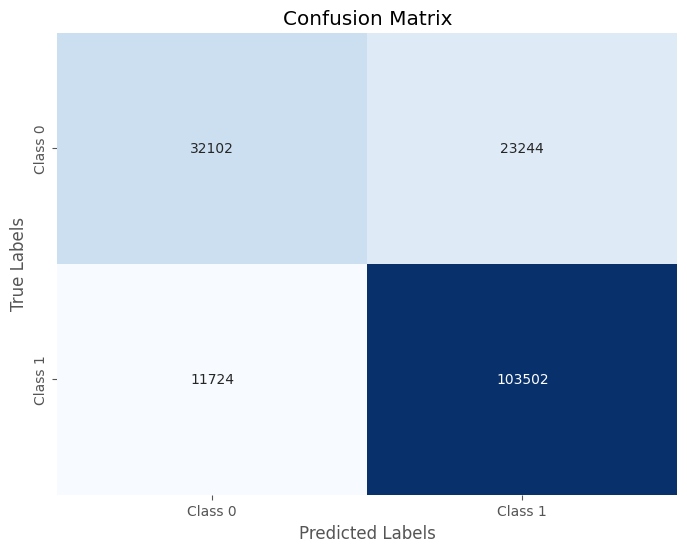

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
with open('../../../models/global_classifier_w_user_data.pkl', 'wb') as file:
    pickle.dump(classifier, file)

In [43]:
del(classifier)

**reg**

In [31]:
df_train_reg = df_train[df_train['target_class'] == 0]

In [32]:
X_cols = [col for col in df_train_reg.columns if col not in ['ID', 'TARGET', 'log_TARGET', 'first_prediction', 'target_class'] ]

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [34]:
regressor = RandomForestRegressor(n_estimators=300, random_state=42)

In [35]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_train_reg[X_cols]), columns=df_train_reg[X_cols].columns)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, df_train_reg.log_TARGET, test_size=0.2, random_state=42)

In [37]:
regressor.fit(X_train, y_train)

train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

In [38]:
print(rmse_test)
print(rmse_train)

1.7991176087210692
0.6724748768141189


In [39]:
with open('../../../models/global_regressor_w_user_data.pkl', 'wb') as file:
    pickle.dump(regressor, file)